<a href="https://colab.research.google.com/github/febriantimayori/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 10 – Thresholding, Segmentasi Sederhana**

---


> Nama: Febrianti Mayori

> NIM: 2241720248

> Kelas: TI-3D

## **TUGAS PRAKTIKUM**

---


**1. Buka Google Colab, kemudian import folder yang ada di Drive Anda.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-10 berikut.**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.**

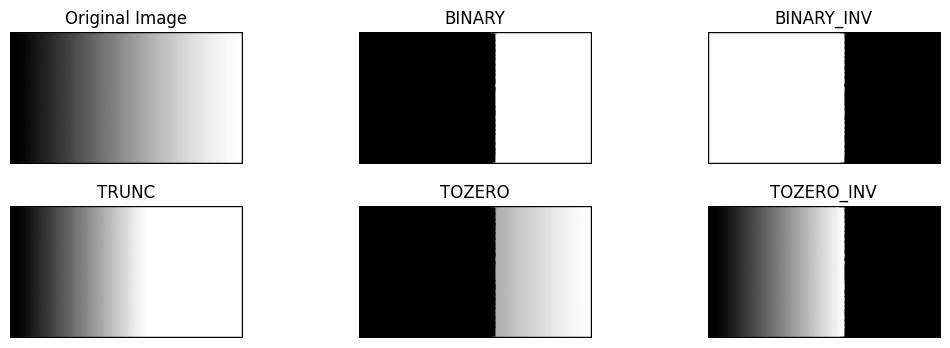

In [3]:
# Load the original grayscale image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Define the threshold value
threshold_value = 170

# Apply different types of thresholding
_, binary = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TOZERO_INV)

# List of thresholded images
images = [original_image, binary, binary_inv, trunc, tozero, tozero_inv]

# Define color and thickness for the black outline
outline_color = (0, 0, 0)  # Black outline
outline_thickness = 5

# Create outlined images
outlined_images = []
for img in images:
    outlined_img = cv2.copyMakeBorder(img, outline_thickness, outline_thickness, outline_thickness, outline_thickness,
                                      cv2.BORDER_CONSTANT, value=outline_color)
    outlined_images.append(outlined_img)

# Titles for display
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Display the results with spacing between each image
plt.figure(figsize=(12, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(outlined_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

# Adjust spacing to make sure there's enough space between images and titles
plt.subplots_adjust(wspace=0.5, hspace=0.3)  # Adjusted space between images and rows
plt.show()

**4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa).**

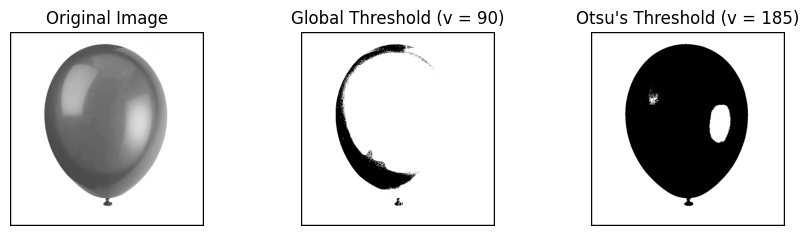

In [4]:
# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Function to calculate Otsu's threshold manually
def otsu_threshold(image):
    pixel_counts, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size

    current_max, threshold = 0, 0
    sum_total, sum_foreground, sum_background = 0, 0, 0
    weight_foreground, weight_background = 0, 0

    # Total sum of pixel intensities
    for i in range(256):
        sum_total += i * pixel_counts[i]

    # Loop through all thresholds (1 to 255) to find the best threshold
    for t in range(256):
        weight_background += pixel_counts[t]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += t * pixel_counts[t]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Calculate between class variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Find the threshold with maximum between class variance
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = t

    return threshold

# Calculate the manual Otsu's threshold
otsu_thresh_value = otsu_threshold(image)

# Apply the thresholds to the image
_, global_thresh_image = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY) # Example global threshold
_, otsu_thresh_image = cv2.threshold(image, otsu_thresh_value, 255, cv2.THRESH_BINARY)

# List of images and titles
images = [image, global_thresh_image, otsu_thresh_image]
titles = ['Original Image', 'Global Threshold (v = 90)', f"Otsu's Threshold (v = {otsu_thresh_value})"]

# Define color and thickness for the black outline
outline_color = (0, 0, 0)  # Black outline
outline_thickness = 5

# Add outline to each image
outlined_images = []
for img in images:
    outlined_img = cv2.copyMakeBorder(img, outline_thickness, outline_thickness, outline_thickness, outline_thickness,
                                      cv2.BORDER_CONSTANT, value=outline_color)
    outlined_images.append(outlined_img)

# Display the results
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(outlined_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Add space between images
plt.show()

**5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.**\
**Petunjuk:**

1. Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
2. Buka link berikut: [here](https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html)
3. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset **None**, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking **warna putih** yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan **Citra Segment**).


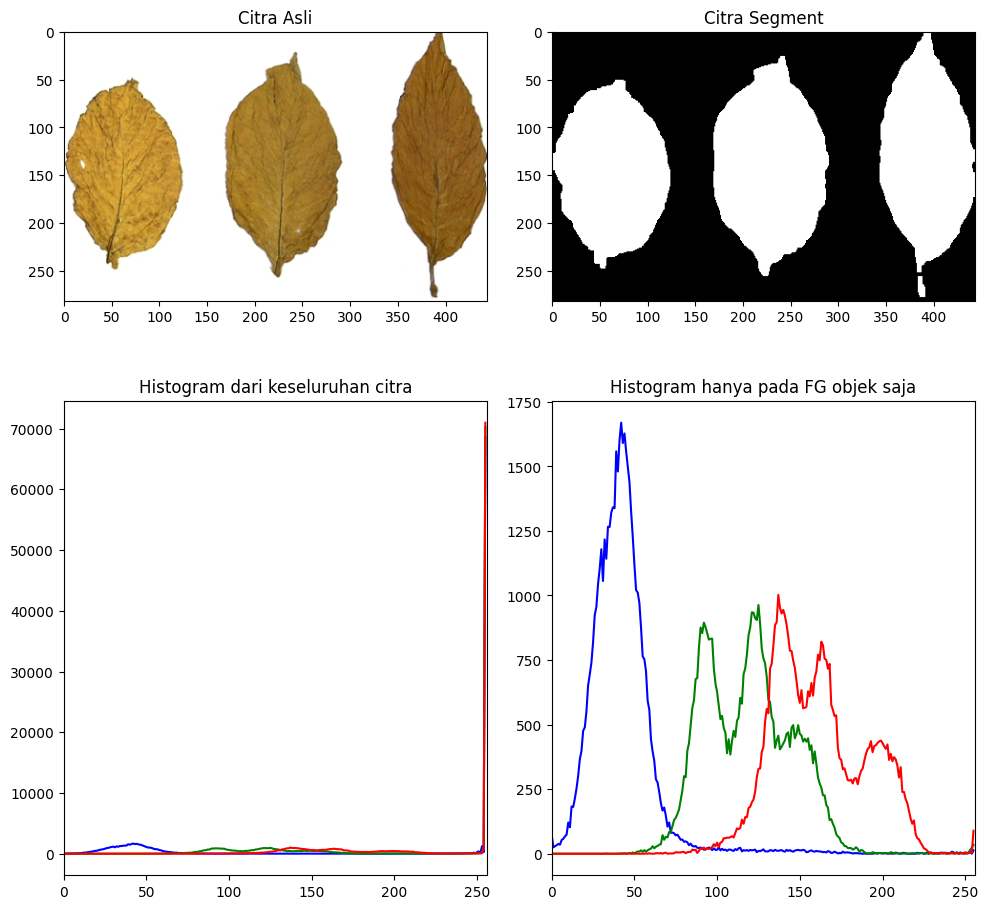

In [5]:
# Load the original image and convert to grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to create the mask for segmentation
_, mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to clean up the mask
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Calculate histogram for the entire image (for each color channel)
hist_full_image = []
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    hist_full_image.append(hist)

# Plot the original image
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Plot the segmented image (mask)
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Plot histograms for each channel in the full image
plt.subplot(2, 2, 3)
for hist, color in zip(hist_full_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Calculate and plot histogram for the masked (foreground) image
hist_masked_image = []
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
    hist_masked_image.append(hist)

plt.subplot(2, 2, 4)
for hist, color in zip(hist_masked_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

**6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja).**

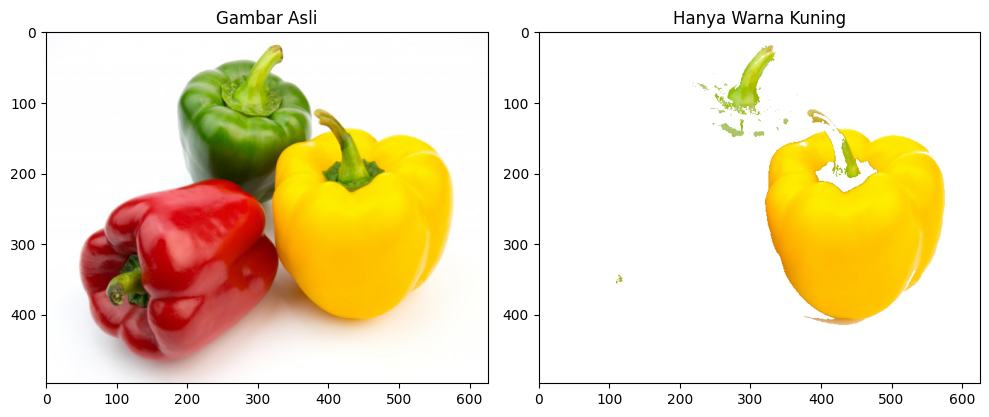

In [6]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))  # Mengubah menjadi vektor 2D dengan 3 channel warna
Z = np.float32(Z)  # Mengubah tipe data ke float32 untuk K-Means

# K-Means clustering
K = 3  # Kita akan membuat 3 klaster, kamu bisa sesuaikan dengan kebutuhan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)  # Kembalikan pusat klaster ke format uint8 (warna asli)
segmented_img = centers[labels.flatten()]  # Buat gambar dari label yang terklasifikasi
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv2.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv2.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(10,10))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
# Axis ditampilkan secara default tanpa perlu menyembunyikannya

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Hanya Warna Kuning')
# Axis ditampilkan secara default tanpa perlu menyembunyikannya

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi?
> **Jawaban:**
*   **Jumlah Klaster tidak sesuai:** Pemilihan jumlah klaster (K) yang tidak tepat, baik terlalu sedikit atau terlalu banyak, dapat menyebabkan hasil segmentasi menjadi kurang akurat.
*   **Rentang warna yang tidak tepat:** Batas bawah dan atas untuk warna kuning kadang tidak akurat, sehingga ada area kuning yang tidak terdeteksi.
*   **Kualitas gambar dan noise:** Noise dalam gambar dapat memengaruhi hasil klastering, sehingga menyulitkan deteksi warna yang diinginkan.
*   **Variasi dalam warna kuning:** Banyaknya variasi nuansa warna kuning dalam citra dapat menyulitkan proses segmentasi.
*   **Transformasi warna:** Menggunakan ruang warna BGR untuk segmentasi terkadang tidak efektif dalam menangkap warna kuning dengan akurat.



**7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.**

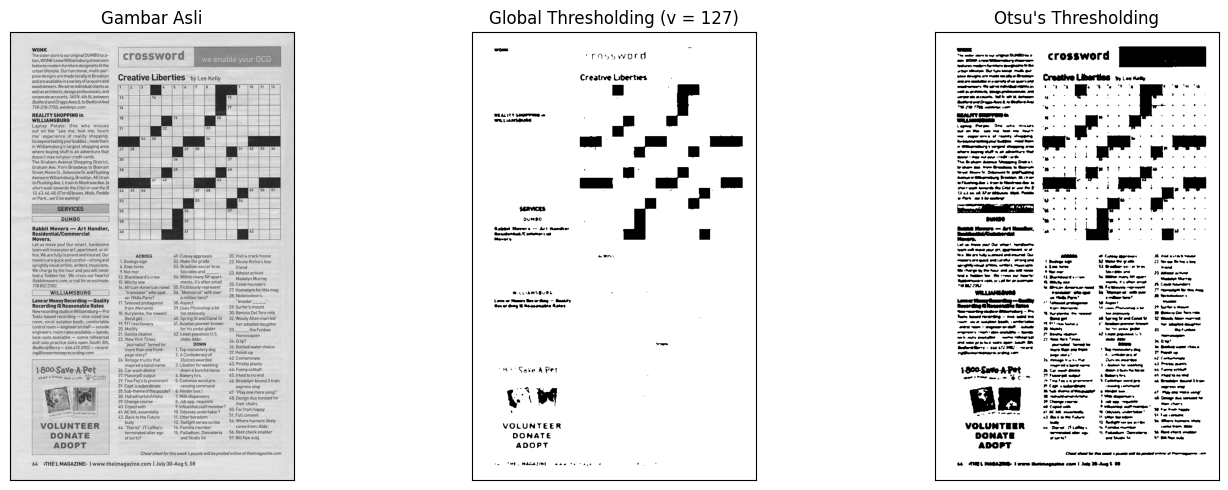

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [7]:
filename = '/content/drive/MyDrive/PCVK/Images/crossword.jpg'
img = cv2.imread(filename, 0)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Global Thresholding
thresh_value = 127  # Threshold global ditentukan secara manual
ret1, th1 = cv2.threshold(blur, thresh_value, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding (tanpa menentukan threshold manual)
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")